<a href="https://colab.research.google.com/github/Savycode10/Prophet-Model-for-Forecasting-Sales/blob/main/Prophet_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet

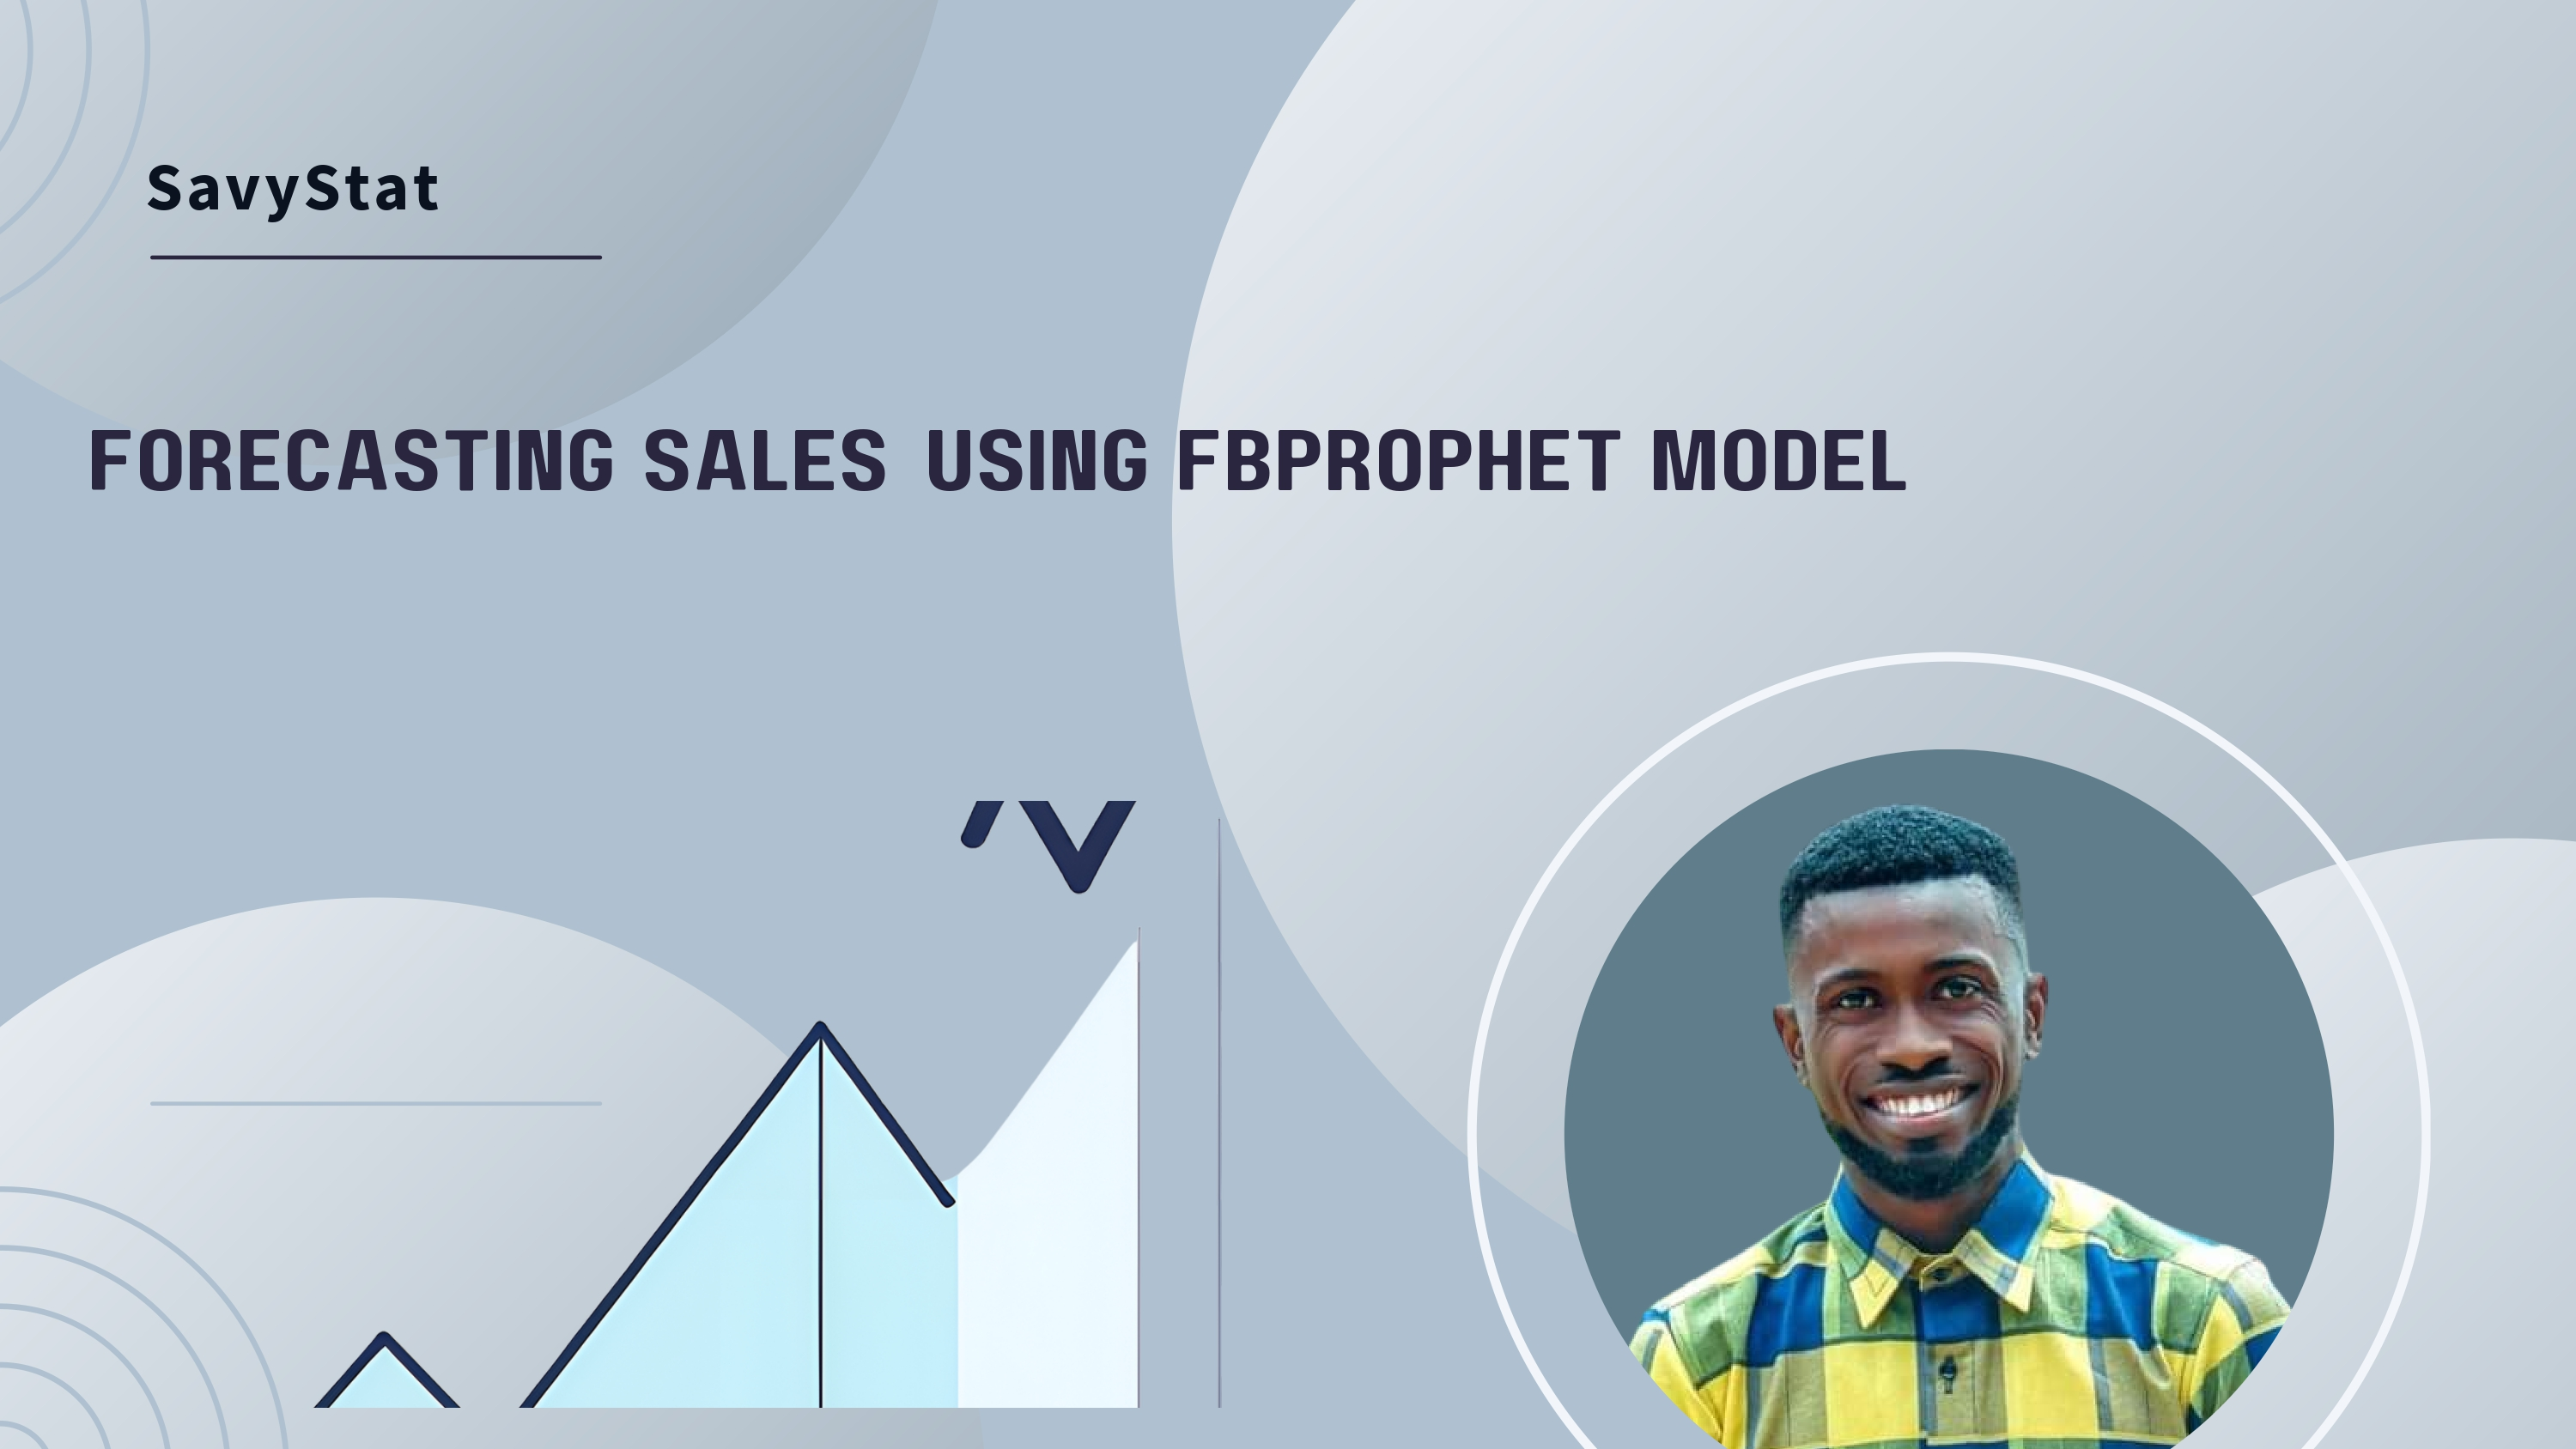

# **Prophet** is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

# **Prophet** is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

**1. Import Dependencies**


In [12]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

**2. Load Data**


In [13]:
df = pd.read_csv('Nat_Gas.csv')
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [14]:
df.dtypes

Dates      object
Prices    float64
dtype: object

**3. Apply Data Preprocessing**

In [15]:
df['Dates'] = pd.to_datetime(df['Dates'])
df.head()

<ipython-input-15-3e9cb0423c7e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


,Dates,Prices
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


In [16]:
df.dtypes

Dates     datetime64[ns]
Prices           float64
dtype: object

In [17]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


**4. Visualization of the time series sales data**

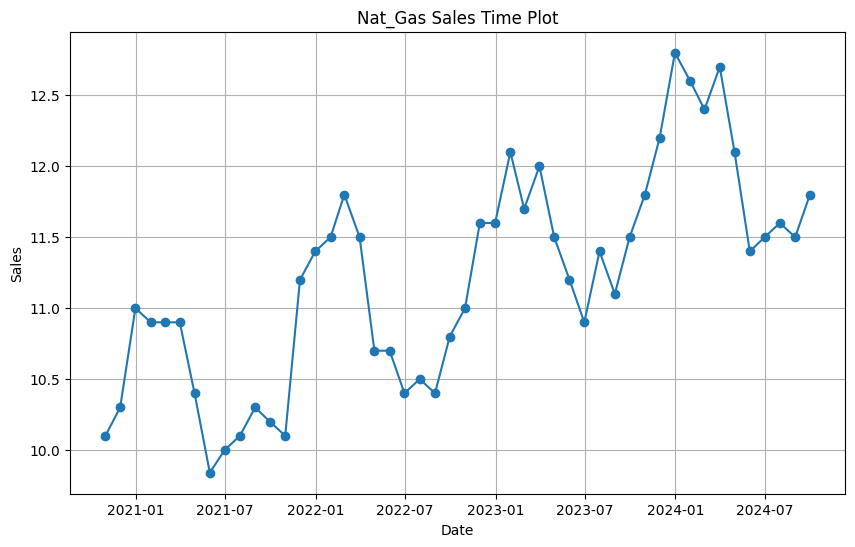

In [18]:
plt.figure(figsize =(10,6))
plt.plot(df['ds'], df['y'], marker = 'o')
plt.title('Nat_Gas Sales Time Plot')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


**5. Create Time Series Model**


In [19]:
m = Prophet(interval_width = 0.95)
T_model = m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_u_j7bpa/kh0ywsbc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_u_j7bpa/98xsizgs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61392', 'data', 'file=/tmp/tmp_u_j7bpa/kh0ywsbc.json', 'init=/tmp/tmp_u_j7bpa/98xsizgs.json', 'output', 'file=/tmp/tmp_u_j7bpa/prophet_model0te8wx5g/prophet_model-20240610234839.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:48:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:48:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [21]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-10-31,10.181210,9.661594,10.220365,10.181210,10.181210,-0.251702,-0.251702,-0.251702,-0.251702,-0.251702,-0.251702,0.0,0.0,0.0,9.929508
1,2020-11-30,10.223802,10.192080,10.765335,10.223802,10.223802,0.256565,0.256565,0.256565,0.256565,0.256565,0.256565,0.0,0.0,0.0,10.480367
2,2020-12-31,10.267815,10.615780,11.200539,10.267815,10.267815,0.645077,0.645077,0.645077,0.645077,0.645077,0.645077,0.0,0.0,0.0,10.912891
3,2021-01-31,10.311827,10.672413,11.258830,10.311827,10.311827,0.639250,0.639250,0.639250,0.639250,0.639250,0.639250,0.0,0.0,0.0,10.951077
4,2021-02-28,10.351580,10.611892,11.173028,10.351580,10.351580,0.548534,0.548534,0.548534,0.548534,0.548534,0.548534,0.0,0.0,0.0,10.900114


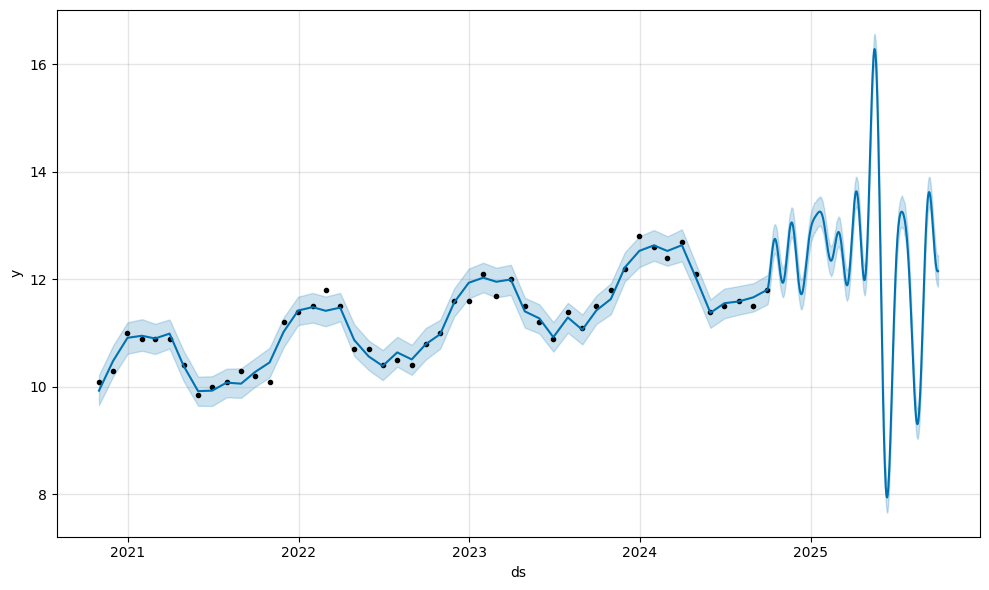

In [22]:
plot1 = m.plot(forecast)


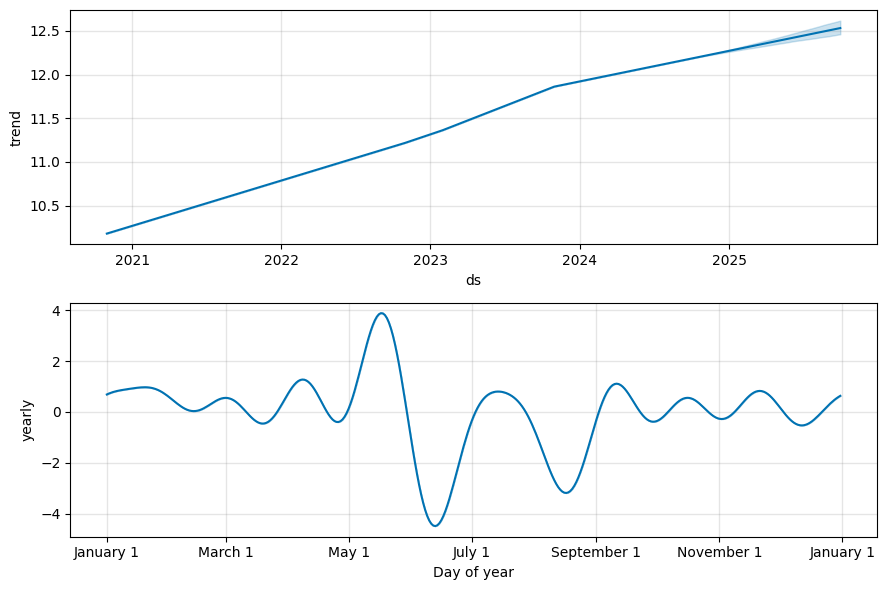

In [23]:
plot2 = m.plot_components(forecast)